## Section1 : Business Understanding

According to the portfolio [theory](https://www.investopedia.com/terms/m/modernportfoliotheory.asp),
it is important to find assets with low correlation, because the portfolio with low-corr assets is expected to earn more w.r.t the risk.

This is why investment institutions doesn't allot their every asset into a single stock. However, in crypto market, it seems every coin follows the direction of bitcoin. If it's true, we may invest only in bitcoin ( In case you decided to attend to crypto market). If it turns out false, we may could find stronger coin which soars more and drops less than bitcoin

### Question 1 : Are altcoins are just a leveraged version of Bitcoin?
In other words, bitcoin and altcoins move towards same direction, but with different magnitude?

### Question 2 : Is the relationship found in question1 applies same regardless of the market situation?
Is the found relationship valid regardless of bitcoin bull or bear?

### Question 3: Is the relationship found in question1 applies consistently regardless of the time?
Is the decoupling behavior persist or just an accident?

## Section2 : Data Understanding - gather, assess data

### Gather Data
You can download the data with this command
```
python data_downloader.py --market=future --db_path=binance_futures_1h.db
```
```
python data_downloader.py --market=spot --db_path=binance_spot_1h.db
```

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Assess to Data

In [2]:
# connect to db
def build_db_and_get_name_and_tables(db_path):
    db = sqlite3.connect(db_path)
    cursor = db.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    table_names = cursor.fetchall()
    table_list = [pd.read_sql_query("SELECT * from %s" % name[0], db) for name in table_names]
    return table_names, table_list

table_names, table_list = build_db_and_get_name_and_tables("./binance_future_1m.db" )


In [3]:
# what coin pairs in the db
table_names

[('_BTCUSDT',),
 ('_ETHUSDT',),
 ('_BCHUSDT',),
 ('_XRPUSDT',),
 ('_EOSUSDT',),
 ('_LTCUSDT',),
 ('_TRXUSDT',),
 ('_ETCUSDT',),
 ('_LINKUSDT',),
 ('_XLMUSDT',),
 ('_ADAUSDT',),
 ('_XMRUSDT',),
 ('_DASHUSDT',),
 ('_ZECUSDT',),
 ('_XTZUSDT',),
 ('_BNBUSDT',),
 ('_ATOMUSDT',),
 ('_ONTUSDT',),
 ('_IOTAUSDT',),
 ('_BATUSDT',),
 ('_VETUSDT',),
 ('_NEOUSDT',),
 ('_QTUMUSDT',),
 ('_IOSTUSDT',),
 ('_THETAUSDT',),
 ('_ALGOUSDT',),
 ('_ZILUSDT',),
 ('_KNCUSDT',),
 ('_ZRXUSDT',),
 ('_COMPUSDT',),
 ('_OMGUSDT',),
 ('_DOGEUSDT',),
 ('_SXPUSDT',),
 ('_KAVAUSDT',),
 ('_BANDUSDT',),
 ('_RLCUSDT',),
 ('_WAVESUSDT',),
 ('_MKRUSDT',),
 ('_SNXUSDT',),
 ('_DOTUSDT',),
 ('_DEFIUSDT',),
 ('_YFIUSDT',),
 ('_BALUSDT',),
 ('_CRVUSDT',),
 ('_TRBUSDT',),
 ('_YFIIUSDT',),
 ('_RUNEUSDT',),
 ('_SUSHIUSDT',),
 ('_SRMUSDT',),
 ('_BZRXUSDT',),
 ('_EGLDUSDT',),
 ('_SOLUSDT',),
 ('_ICXUSDT',),
 ('_STORJUSDT',),
 ('_BLZUSDT',),
 ('_UNIUSDT',),
 ('_AVAXUSDT',),
 ('_FTMUSDT',),
 ('_HNTUSDT',),
 ('_ENJUSDT',),
 ('_FLMUSDT',),

('_BTCUSDT_211231',),
('_ETHUSDT_211231',)

These pairs are not perpetual, while others are all perpetual
Will drop these

Also, {coin_ticker}USD, other than {coin_ticker}USDT is not available pair for me, So I will also drop these

In [4]:
len(table_names)

139

In [5]:
# bitcoin data overview
bitcoin_data = table_list[0]
bitcoin_data.head()

,timestamp,open,high,low,close,volume
0,1630422000000,47297.50,47374.50,47292.03,47364.75,436.793
1,1630422060000,47364.83,47395.00,47337.06,47395.00,367.112
2,1630422120000,47395.00,47421.31,47382.27,47405.81,407.808
3,1630422180000,47405.80,47405.81,47316.39,47357.01,368.028
4,1630422240000,47357.02,47376.08,47272.08,47286.02,265.485


In [7]:
pd.to_datetime(bitcoin_data["timestamp"] * 1000000)

0       2021-08-31 15:00:00
1       2021-08-31 15:01:00
2       2021-08-31 15:02:00
3       2021-08-31 15:03:00
4       2021-08-31 15:04:00
                ...        
42992   2021-09-30 11:32:00
42993   2021-09-30 11:33:00
42994   2021-09-30 11:34:00
42995   2021-09-30 11:35:00
42996   2021-09-30 11:36:00
Name: timestamp, Length: 42997, dtype: datetime64[ns]

### Summary : We have all future market coin pairs of 42997 minute data starting starting from September 1st approximately 

## Section3 : Prepare Data - complement missing data and trim the data

In [8]:
bitcoin_data.describe()

,timestamp,open,high,low,close,volume
count,4.299700e+04,42997.000000,42997.000000,42997.000000,42997.000000,42997.000000
mean,1.631712e+12,46111.077884,46138.935714,46083.267480,46110.986640,247.347542
std,7.447385e+08,2935.178017,2930.348200,2939.606914,2935.207421,405.478575
min,1.630422e+12,39654.590000,39977.010000,39503.580000,39660.240000,10.360000
25%,1.631067e+12,43468.280000,43499.010000,43434.270000,43468.270000,81.273000
50%,1.631712e+12,46144.990000,46172.720000,46114.930000,46144.880000,137.852000
75%,1.632357e+12,48029.990000,48049.450000,48010.000000,48030.000000,256.628000
max,1.633002e+12,52885.190000,52950.000000,52866.330000,52885.180000,12295.716000


Luckily, No missing data is found

### Merge all of the tables into one dataframe to easily handle the data

In [9]:
## Merge splitted table data into one to compute correlation between coins
def merge_tables_into_one_dataframe(table_names, table_list):
    merged = table_list[0]['timestamp']
    for name, df in zip(table_names, table_list):
        if not name[0].endswith("USDT"):
            continue
        col_name = f'{name[0][1:]}'.replace("USDT", "")
        df[col_name] = df['close']
#         df[col_name] = df['close'] / df['close'][0]  # normalize price data for fair comparison
        merged = pd.merge(merged, df[['timestamp',col_name]], on='timestamp', how='left')
    
    return merged

merged = merge_tables_into_one_dataframe(table_names, table_list)

In [10]:
merged.head()

,timestamp,BTC,ETH,BCH,XRP,EOS,LTC,TRX,ETC,LINK,...,AUDIO,RAY,C98,MASK,ATA,DYDX,1000XEC,GALA,CELO,AR
0,1630422000000,47364.75,3391.54,639.66,1.1333,4.971,170.74,0.08827,63.331,26.620,...,2.5608,12.975,4.6607,12.0786,1.4699,NaN,NaN,NaN,NaN,NaN
1,1630422060000,47395.00,3394.37,639.98,1.1343,4.981,171.01,0.08828,63.422,26.688,...,2.5643,13.066,4.6510,12.0468,1.4710,NaN,NaN,NaN,NaN,NaN
2,1630422120000,47405.81,3394.94,639.72,1.1344,4.980,171.09,0.08836,63.419,26.718,...,2.5635,13.130,4.6458,12.0680,1.4773,NaN,NaN,NaN,NaN,NaN
3,1630422180000,47357.01,3390.67,639.28,1.1327,4.972,170.74,0.08819,63.357,26.662,...,2.5650,13.078,4.6356,12.0292,1.4713,NaN,NaN,NaN,NaN,NaN
4,1630422240000,47286.02,3383.05,638.26,1.1310,4.961,170.36,0.08806,63.174,26.542,...,2.5543,13.041,4.6116,11.9876,1.4641,NaN,NaN,NaN,NaN,NaN


In [11]:
merged.tail()

,timestamp,BTC,ETH,BCH,XRP,EOS,LTC,TRX,ETC,LINK,...,AUDIO,RAY,C98,MASK,ATA,DYDX,1000XEC,GALA,CELO,AR
42992,1633001520000,43078.20,2964.64,495.24,0.9382,3.844,150.73,0.08758,46.253,23.742,...,2.0273,9.326,3.0447,8.4908,0.7980,26.106,0.24510,0.09222,5.735,41.613
42993,1633001580000,43051.62,2961.85,494.70,0.9373,3.845,150.63,0.08754,46.231,23.737,...,2.0248,9.334,3.0368,8.4861,0.7974,26.022,0.24492,0.09223,5.740,41.602
42994,1633001640000,43071.79,2964.46,495.12,0.9377,3.844,150.72,0.08757,46.275,23.749,...,2.0253,9.344,3.0407,8.5003,0.7976,26.067,0.24490,0.09238,5.745,41.630
42995,1633001700000,43003.37,2959.70,494.57,0.9366,3.838,150.49,0.08746,46.203,23.707,...,2.0201,9.334,3.0383,8.4844,0.7967,26.009,0.24432,0.09175,5.743,41.594
42996,1633001760000,43005.88,2957.22,494.19,0.9355,3.834,150.38,0.08739,46.170,23.680,...,2.0227,9.311,3.0331,8.4687,0.7964,25.968,0.24435,0.09153,5.721,41.438


In [12]:
merged.describe()

,timestamp,BTC,ETH,BCH,XRP,EOS,LTC,TRX,ETC,LINK,...,AUDIO,RAY,C98,MASK,ATA,DYDX,1000XEC,GALA,CELO,AR
count,4.299700e+04,42997.000000,42997.000000,42997.000000,42997.000000,42997.000000,42997.000000,42997.000000,42997.000000,42997.000000,...,42997.000000,42997.000000,42997.000000,42997.000000,42997.000000,29287.000000,19207.000000,17767.000000,4807.000000,3367.000000
mean,1.631712e+12,46110.986640,3353.254945,611.657249,1.080926,4.771045,176.354010,0.098329,56.843578,27.286681,...,2.388611,12.082511,3.757310,10.267552,1.126847,14.836886,0.227450,0.098281,6.004673,41.277808
std,7.447385e+08,2935.207421,338.946238,79.067596,0.128688,0.655701,21.654639,0.009490,8.267379,3.214770,...,0.307619,1.844844,0.550606,1.518361,0.201250,4.176374,0.015277,0.012437,0.279160,1.687245
min,1.630422e+12,39660.240000,2659.630000,471.550000,0.858400,3.636000,139.880000,0.075220,44.102000,20.868000,...,1.774700,8.919000,2.707200,7.206800,0.759300,9.165000,0.191850,0.076060,5.507000,38.046000
25%,1.631067e+12,43468.270000,3054.300000,537.720000,0.952800,4.197000,158.340000,0.090570,49.215000,24.233000,...,2.132200,10.302000,3.329800,8.826800,0.957200,11.828000,0.214245,0.088690,5.812000,39.777000
50%,1.631712e+12,46144.880000,3371.930000,633.490000,1.076900,4.792000,179.150000,0.096570,56.895000,27.369000,...,2.291400,12.211000,3.754500,10.354300,1.154800,13.470000,0.227330,0.096340,5.944000,41.257000
75%,1.632357e+12,48030.000000,3546.970000,660.970000,1.127400,5.222000,184.200000,0.104590,59.561000,29.624000,...,2.691600,13.312000,4.145200,11.755400,1.302200,16.451000,0.234760,0.106970,6.191500,42.917500
max,1.633002e+12,52885.180000,4027.300000,803.360000,1.416100,6.397000,233.480000,0.122960,77.441000,36.373000,...,3.195000,16.956000,5.285500,13.821100,1.602900,27.750000,0.273970,0.138000,6.816000,44.917000


Some pairs have far less data than the others. Let's check

In [13]:
merged.loc[:,merged.count() < 40000].describe()

,DYDX,1000XEC,GALA,CELO,AR
count,29287.000000,19207.000000,17767.000000,4807.000000,3367.000000
mean,14.836886,0.227450,0.098281,6.004673,41.277808
std,4.176374,0.015277,0.012437,0.279160,1.687245
min,9.165000,0.191850,0.076060,5.507000,38.046000
25%,11.828000,0.214245,0.088690,5.812000,39.777000
50%,13.470000,0.227330,0.096340,5.944000,41.257000
75%,16.451000,0.234760,0.106970,6.191500,42.917500
max,27.750000,0.273970,0.138000,6.816000,44.917000


In [14]:
merged.loc[:,merged.count() < 40000].columns

Index(['DYDX', '1000XEC', 'GALA', 'CELO', 'AR'], dtype='object')

### Complement the missing data from other sources
These five pairs are recently opened at the future market, so less data is available. We can complement this data with the spot trading data

In [33]:
from data_downloader import download_binance_futures_data

In [34]:
symbols = ",".join([f"{coin}/USDT" for coin in ['DYDX', 'XEC', 'GALA', 'CELO', 'AR']])
download_binance_futures_data("spot", "binance_spot_1m.db", symbols)

downloading data for 5 symbols : ['DYDX/USDT', 'XEC/USDT', 'GALA/USDT', 'CELO/USDT', 'AR/USDT']
downloaded 30911 rows for DYDX/USDT in 16 seconds, download speed is 1968 row per second
downloaded 39071 rows for XEC/USDT in 20 seconds, download speed is 1944 row per second
downloaded 24911 rows for GALA/USDT in 13 seconds, download speed is 1976 row per second
downloaded 43092 rows for CELO/USDT in 22 seconds, download speed is 1947 row per second
downloaded 43092 rows for AR/USDT in 22 seconds, download speed is 1949 row per second


The number of rows vary because they have diffent market-open dates.

"1000XEC" is rebranded version of XEC. Will have to use XEC then '*1000' to match the rebranded price.


In [15]:
spot_table_names, spot_table_list = build_db_and_get_name_and_tables("binance_spot_1m.db")
spot_table_list[0].head()

,timestamp,open,high,low,close,volume
0,1631152800000,3.000,14.444,3.000,11.327,615209.52
1,1631152860000,11.327,11.327,10.490,11.088,376937.58
2,1631152920000,11.066,11.484,10.814,11.245,197552.85
3,1631152980000,11.228,11.344,10.800,11.195,186695.40
4,1631153040000,11.195,11.330,11.071,11.110,87108.28


In [16]:
for tbl in spot_table_list:
    print(tbl.shape)

(30911, 6)
(39071, 6)
(24911, 6)
(43092, 6)
(43092, 6)


In [17]:
spot_merged = merge_tables_into_one_dataframe(spot_table_names, spot_table_list)
spot_merged.describe()

,timestamp,DYDX,XEC,GALA,CELO,AR
count,3.091100e+04,30911.000000,30911.000000,24911.000000,30911.000000,30911.000000
mean,1.632081e+12,14.796898,0.000230,0.090448,5.760502,50.359671
std,5.360929e+08,4.126348,0.000017,0.021837,0.782480,7.985291
min,1.631153e+12,9.156000,0.000185,0.043050,4.162000,34.230000
25%,1.631616e+12,11.867000,0.000215,0.083190,5.120000,43.430000
50%,1.632080e+12,13.460000,0.000229,0.093680,5.676000,49.860000
75%,1.632544e+12,16.210500,0.000243,0.105425,6.329500,55.795000
max,1.633015e+12,27.768000,0.000287,0.144850,8.242000,74.090000


In [18]:
spot_merged['1000XEC'] = spot_merged['XEC'] * 1000

In [19]:
spot_merged.head()

,timestamp,DYDX,XEC,GALA,CELO,AR,1000XEC
0,1631152800000,11.327,0.000251,NaN,4.250,64.57,0.25109
1,1631152860000,11.088,0.000254,NaN,4.244,65.39,0.25432
2,1631152920000,11.245,0.000253,NaN,4.238,65.66,0.25346
3,1631152980000,11.195,0.000254,NaN,4.243,64.99,0.25386
4,1631153040000,11.110,0.000254,NaN,4.247,65.62,0.25389


### Integrate two data sources 

In [21]:
merged.set_index('timestamp', inplace=True)
spot_merged.set_index('timestamp', inplace=True)
merged.update(spot_merged)

In [113]:
merged.update(spot_merged)

In [22]:
merged.describe()

,BTC,ETH,BCH,XRP,EOS,LTC,TRX,ETC,LINK,XLM,...,AUDIO,RAY,C98,MASK,ATA,DYDX,1000XEC,GALA,CELO,AR
count,42997.000000,42997.000000,42997.000000,42997.000000,42997.000000,42997.000000,42997.000000,42997.000000,42997.000000,42997.000000,...,42997.000000,42997.000000,42997.000000,42997.000000,42997.000000,30817.000000,30817.000000,24817.000000,30817.000000,30817.000000
mean,46110.986640,3353.254945,611.657249,1.080926,4.771045,176.354010,0.098329,56.843578,27.286681,0.321275,...,2.388611,12.082511,3.757310,10.267552,1.126847,14.765381,0.230137,0.090389,5.761254,50.391868
std,2935.207421,338.946238,79.067596,0.128688,0.655701,21.654639,0.009490,8.267379,3.214770,0.038528,...,0.307619,1.844844,0.550606,1.518361,0.201250,4.092565,0.017394,0.021885,0.783773,7.977627
min,39660.240000,2659.630000,471.550000,0.858400,3.636000,139.880000,0.075220,44.102000,20.868000,0.254960,...,1.774700,8.919000,2.707200,7.206800,0.759300,9.156000,0.185360,0.043050,4.162000,34.230000
25%,43468.270000,3054.300000,537.720000,0.952800,4.197000,158.340000,0.090570,49.215000,24.233000,0.282820,...,2.132200,10.302000,3.329800,8.826800,0.957200,11.862000,0.215280,0.082950,5.119000,43.500000
50%,46144.880000,3371.930000,633.490000,1.076900,4.792000,179.150000,0.096570,56.895000,27.369000,0.323010,...,2.291400,12.211000,3.754500,10.354300,1.154800,13.449000,0.229190,0.093700,5.670000,49.880000
75%,48030.000000,3546.970000,660.970000,1.127400,5.222000,184.200000,0.104590,59.561000,29.624000,0.339430,...,2.691600,13.312000,4.145200,11.755400,1.302200,16.177000,0.243500,0.105480,6.331000,55.830000
max,52885.180000,4027.300000,803.360000,1.416100,6.397000,233.480000,0.122960,77.441000,36.373000,0.431870,...,3.195000,16.956000,5.285500,13.821100,1.602900,27.768000,0.286770,0.144850,8.242000,74.090000


In [23]:
merged.head()

,BTC,ETH,BCH,XRP,EOS,LTC,TRX,ETC,LINK,XLM,...,AUDIO,RAY,C98,MASK,ATA,DYDX,1000XEC,GALA,CELO,AR
timestamp,,,,,,,,,,,,,,,,,,,,,
1630422000000,47364.75,3391.54,639.66,1.1333,4.971,170.74,0.08827,63.331,26.620,0.33912,...,2.5608,12.975,4.6607,12.0786,1.4699,NaN,NaN,NaN,NaN,NaN
1630422060000,47395.00,3394.37,639.98,1.1343,4.981,171.01,0.08828,63.422,26.688,0.33979,...,2.5643,13.066,4.6510,12.0468,1.4710,NaN,NaN,NaN,NaN,NaN
1630422120000,47405.81,3394.94,639.72,1.1344,4.980,171.09,0.08836,63.419,26.718,0.34011,...,2.5635,13.130,4.6458,12.0680,1.4773,NaN,NaN,NaN,NaN,NaN
1630422180000,47357.01,3390.67,639.28,1.1327,4.972,170.74,0.08819,63.357,26.662,0.34015,...,2.5650,13.078,4.6356,12.0292,1.4713,NaN,NaN,NaN,NaN,NaN
1630422240000,47286.02,3383.05,638.26,1.1310,4.961,170.36,0.08806,63.174,26.542,0.33903,...,2.5543,13.041,4.6116,11.9876,1.4641,NaN,NaN,NaN,NaN,NaN


In [24]:
merged.tail()

,BTC,ETH,BCH,XRP,EOS,LTC,TRX,ETC,LINK,XLM,...,AUDIO,RAY,C98,MASK,ATA,DYDX,1000XEC,GALA,CELO,AR
timestamp,,,,,,,,,,,,,,,,,,,,,
1633001520000,43078.20,2964.64,495.24,0.9382,3.844,150.73,0.08758,46.253,23.742,0.27402,...,2.0273,9.326,3.0447,8.4908,0.7980,26.112,0.24520,0.09218,5.739,41.65
1633001580000,43051.62,2961.85,494.70,0.9373,3.845,150.63,0.08754,46.231,23.737,0.27371,...,2.0248,9.334,3.0368,8.4861,0.7974,26.009,0.24480,0.09229,5.746,41.64
1633001640000,43071.79,2964.46,495.12,0.9377,3.844,150.72,0.08757,46.275,23.749,0.27396,...,2.0253,9.344,3.0407,8.5003,0.7976,26.075,0.24492,0.09234,5.749,41.68
1633001700000,43003.37,2959.70,494.57,0.9366,3.838,150.49,0.08746,46.203,23.707,0.27378,...,2.0201,9.334,3.0383,8.4844,0.7967,26.008,0.24418,0.09172,5.744,41.61
1633001760000,43005.88,2957.22,494.19,0.9355,3.834,150.38,0.08739,46.170,23.680,0.27388,...,2.0227,9.311,3.0331,8.4687,0.7964,25.975,0.24431,0.09154,5.729,41.50


### still some datas are missing in [DYDX	1000XEC	GALA	CELO	AR]
=> use only rows where all of the coin pairs are available

In [25]:
merged_trimmed = merged.loc[:,merged.count()>30000]
merged_trimmed = merged_trimmed.iloc[-30000:, :]
merged_trimmed.describe()

,BTC,ETH,BCH,XRP,EOS,LTC,TRX,ETC,LINK,XLM,...,IOTX,AUDIO,RAY,C98,MASK,ATA,DYDX,1000XEC,CELO,AR
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,44791.869897,3189.379211,576.141740,1.014020,4.490550,167.261717,0.098679,52.536885,26.070908,0.302608,...,0.060964,2.302793,11.905304,3.512303,9.783162,1.048265,14.805071,0.229543,5.789570,50.078199
std,2205.825278,237.829911,62.431408,0.075064,0.498399,15.250593,0.010559,4.968281,2.684280,0.025688,...,0.005178,0.277499,2.098814,0.382146,1.312002,0.168963,4.137075,0.017237,0.772513,7.849631
min,39660.240000,2659.630000,471.550000,0.858400,3.636000,139.880000,0.082540,44.102000,20.868000,0.254960,...,0.048000,1.905900,8.919000,2.728000,7.397200,0.759300,9.156000,0.185360,4.239000,34.230000
25%,42787.222500,2962.827500,512.780000,0.938400,4.014000,151.920000,0.089880,47.327000,23.648000,0.277740,...,0.056450,2.107300,9.917000,3.171400,8.619600,0.895100,11.845000,0.215020,5.136000,43.410000
50%,44713.375000,3196.910000,599.070000,1.020900,4.576000,171.955000,0.095215,54.184500,26.048500,0.307470,...,0.062180,2.226600,11.859500,3.512900,9.319950,1.037950,13.464000,0.228760,5.718000,49.710000
75%,46907.902500,3402.675000,636.110000,1.082200,4.879000,181.190000,0.106150,57.128250,28.273250,0.324943,...,0.064930,2.395700,13.642000,3.825500,10.939100,1.197425,16.303250,0.240820,6.345000,55.240000
max,48771.590000,3672.290000,673.630000,1.241300,5.507000,233.480000,0.122960,60.354000,32.123000,0.359520,...,0.074890,3.195000,16.956000,4.390000,13.821100,1.396200,27.768000,0.286770,8.242000,74.090000


### now the data seems good!

## Section4 : Evaluate the Results - Findings with visualization

### Question 1 : Are altcoins are just a leveraged version of Bitcoin?
In other words, bitcoin and altcoins move towards same direction, but with different magnitude?

To answer this question, we need to find correlationship between the coins.
If correlationship coefficient is high, this means the ROE curve of that pair could be synthesized by Bitcoin.

For example, if one of coin has 1.0 correlationship, then ROE curve of this coin is equivalent  to 2X or 3X Bitcoin leverage. (Maybe 2.5X, it remains to find) This is because high correlationship means linear relationship exists between them.

In [26]:
merged_trimmed.head()

,BTC,ETH,BCH,XRP,EOS,LTC,TRX,ETC,LINK,XLM,...,IOTX,AUDIO,RAY,C98,MASK,ATA,DYDX,1000XEC,CELO,AR
timestamp,,,,,,,,,,,,,,,,,,,,,
1631201820000,46812.46,3505.25,667.01,1.1072,4.818,185.42,0.09287,59.143,28.260,0.33543,...,0.06749,2.3827,15.187,4.1239,9.4824,1.1280,15.004,0.25227,5.323,63.03
1631201880000,46813.83,3506.00,667.01,1.1081,4.822,185.47,0.09291,59.188,28.289,0.33598,...,0.06767,2.3850,15.156,4.1479,9.5520,1.1255,14.973,0.25234,5.323,64.00
1631201940000,46815.86,3506.56,667.23,1.1082,4.830,185.60,0.09299,59.221,28.312,0.33617,...,0.06760,2.3801,15.146,4.1516,9.5761,1.1259,14.944,0.25213,5.326,63.98
1631202000000,46788.01,3502.67,666.65,1.1078,4.826,185.34,0.09288,59.193,28.275,0.33543,...,0.06748,2.3622,15.091,4.1362,9.5835,1.1259,14.836,0.25228,5.352,63.65
1631202060000,46810.01,3506.61,667.10,1.1088,4.830,185.39,0.09288,59.217,28.299,0.33567,...,0.06751,2.3701,15.119,4.1469,9.6631,1.1273,14.999,0.25186,5.430,63.66


In [27]:
# Normalize the data to balance the scale of each coins
normalized_ = merged_trimmed.apply(lambda x:x/x.iloc[0])
normalized_.head()

,BTC,ETH,BCH,XRP,EOS,LTC,TRX,ETC,LINK,XLM,...,IOTX,AUDIO,RAY,C98,MASK,ATA,DYDX,1000XEC,CELO,AR
timestamp,,,,,,,,,,,,,,,,,,,,,
1631201820000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1631201880000,1.000029,1.000214,1.000000,1.000813,1.000830,1.000270,1.000431,1.000761,1.001026,1.001640,...,1.002667,1.000965,0.997959,1.005820,1.007340,0.997784,0.997934,1.000277,1.000000,1.015389
1631201940000,1.000073,1.000374,1.000330,1.000903,1.002491,1.000971,1.001292,1.001319,1.001840,1.002206,...,1.001630,0.998909,0.997300,1.006717,1.009881,0.998138,0.996001,0.999445,1.000564,1.015072
1631202000000,0.999478,0.999264,0.999460,1.000542,1.001660,0.999569,1.000108,1.000845,1.000531,1.000000,...,0.999852,0.991396,0.993679,1.002983,1.010662,0.998138,0.988803,1.000040,1.005448,1.009837
1631202060000,0.999948,1.000388,1.000135,1.001445,1.002491,0.999838,1.000108,1.001251,1.001380,1.000715,...,1.000296,0.994712,0.995522,1.005577,1.019056,0.999379,0.999667,0.998375,1.020101,1.009995


In [28]:
normalized_.index = pd.to_datetime(normalized_.index * 1000000)

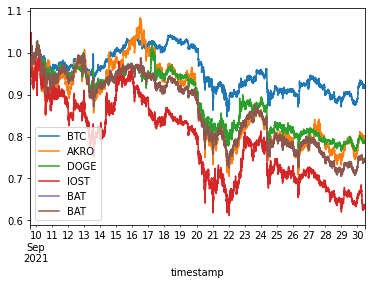

In [64]:
# Randomly sampled coins moves similarly with Bitcoin
random_idxes = np.random.randint(2, high=len(normalized_.columns), size=5)
normalized_.iloc[:, [0]+random_idxes.tolist()].plot()


plt.xticks(rotation=45)
plt.savefig('bitcoin_and_random_coin_plot.png', dpi=300)

In [31]:
df_for_corr = normalized_.corr()
df_for_corr.head()

,BTC,ETH,BCH,XRP,EOS,LTC,TRX,ETC,LINK,XLM,...,IOTX,AUDIO,RAY,C98,MASK,ATA,DYDX,1000XEC,CELO,AR
BTC,1.000000,0.970200,0.896241,0.906982,0.962152,0.921108,0.815176,0.919297,0.946196,0.908789,...,0.596172,0.744628,0.736128,0.895026,0.769459,0.902154,-0.316611,0.303985,-0.603240,0.654962
ETH,0.970200,1.000000,0.934134,0.952315,0.941418,0.956987,0.824188,0.955636,0.971734,0.950150,...,0.624694,0.666879,0.814853,0.884779,0.752934,0.919653,-0.350385,0.311386,-0.662287,0.741810
BCH,0.896241,0.934134,1.000000,0.964565,0.929060,0.981201,0.764608,0.993517,0.919330,0.982980,...,0.528740,0.589411,0.925346,0.921517,0.678682,0.939406,-0.571172,0.136164,-0.723649,0.843402
XRP,0.906982,0.952315,0.964565,1.000000,0.907523,0.964064,0.781599,0.977287,0.943658,0.985108,...,0.616498,0.535929,0.916918,0.886111,0.684206,0.914223,-0.442056,0.252258,-0.707667,0.865219
EOS,0.962152,0.941418,0.929060,0.907523,1.000000,0.944873,0.812855,0.942953,0.904682,0.918506,...,0.499683,0.767661,0.782322,0.916203,0.797131,0.927466,-0.440332,0.145462,-0.638106,0.657054


In [32]:
bitcoin_and_others = df_for_corr.corr()['BTC'].sort_values()

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(bitcoin_and_others)

COTI       -0.943377
CELO       -0.940784
BTCDOM     -0.929635
CELR       -0.915526
OMG        -0.873250
DYDX       -0.860858
AVAX       -0.828573
ATOM       -0.790074
REN        -0.744944
1000SHIB   -0.012830
1000XEC     0.219435
AXS         0.256892
LUNA        0.438541
XTZ         0.636028
CRV         0.686579
ONE         0.794931
FTM         0.849227
IOTX        0.850807
SOL         0.882026
UNI         0.887091
AUDIO       0.893121
EGLD        0.895742
AR          0.896122
ADA         0.915079
KAVA        0.930719
RAY         0.930845
SRM         0.938698
HBAR        0.945767
ALGO        0.946744
SUSHI       0.953993
WAVES       0.954917
MASK        0.956043
TOMO        0.961861
NEAR        0.964911
HNT         0.965086
DENT        0.965487
SNX         0.965673
IOST        0.965737
RVN         0.967010
DOT         0.967278
REEF        0.967354
CTK         0.967503
SAND        0.968876
TRX         0.969411
SXP         0.969785
CVC         0.970838
RLC         0.970846
QTUM        0

In [36]:
for k in np.arange(0.3,1.0,0.1):
    ratio = (bitcoin_and_others > k).mean()
    print(f"{ratio * 100:.2f}% of coins have more than {k:.1f} correlationship")

89.84% of coins have more than 0.3 correlationship
89.84% of coins have more than 0.4 correlationship
89.06% of coins have more than 0.5 correlationship
89.06% of coins have more than 0.6 correlationship
87.50% of coins have more than 0.7 correlationship
86.72% of coins have more than 0.8 correlationship
81.25% of coins have more than 0.9 correlationship


In [38]:
decoupled_list = bitcoin_and_others[bitcoin_and_others < 0.0].keys().tolist()
decoupled_list

['COTI',
 'CELO',
 'BTCDOM',
 'CELR',
 'OMG',
 'DYDX',
 'AVAX',
 'ATOM',
 'REN',
 '1000SHIB']

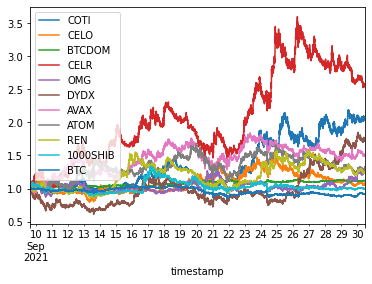

In [40]:
# Decoupled coins move differently with Bitcoin
normalized_[decoupled_list + ['BTC']].plot()

plt.savefig("Bitcoin_and_decoupled_coins.png", dpi=300)

### Findings 1. Not all altcoins are not leveraged version of Bitcoin. About 7 % of coins had negative correlationship  for 3 weeks

These negative correlated coins could highly help the portfolios to secure stable returns compared to the risk. However, those coins not only had negative correlationship, but they way outperformed bitcoin. If you could find those coins in advance, you can enjoy huge alpha.


([<matplotlib.axis.XTick at 0x7fab79491510>,
 [Text(0, 0, 'COTI'),
  Text(5, 0, 'DYDX'),
  Text(10, 0, '1000XEC'),
  Text(15, 0, 'ONE'),
  Text(20, 0, 'AUDIO'),
  Text(25, 0, 'RAY'),
  Text(30, 0, 'WAVES'),
  Text(35, 0, 'DENT'),
  Text(40, 0, 'REEF'),
  Text(45, 0, 'CVC'),
  Text(50, 0, 'ENJ'),
  Text(55, 0, 'MANA'),
  Text(60, 0, 'THETA'),
  Text(65, 0, 'XLM'),
  Text(70, 0, 'CHR'),
  Text(75, 0, 'ZIL'),
  Text(80, 0, 'GTC'),
  Text(85, 0, 'IOTA'),
  Text(90, 0, 'DASH'),
  Text(95, 0, 'NKN'),
  Text(100, 0, 'BEL'),
  Text(105, 0, 'LINK'),
  Text(110, 0, 'SFP'),
  Text(115, 0, 'RSR'),
  Text(120, 0, 'BAND'),
  Text(125, 0, 'KEEP')])

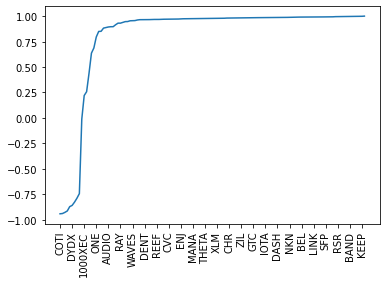

In [41]:
# todo : how to not print long explantory texts(XTick at.., Text()) when plotting? 
bitcoin_and_others.sort_values().plot()
plt.xticks(np.arange(0, 130, 5),[bitcoin_and_others.keys()[i] for i in np.arange(0, 130, 5)],
          rotation=90)

### Question 2 : Is the relationship found in question1 applies same regardless of the market situation?
Is the found relationship valid regardless of bitcoin bull or bear?

### compute correlation when bear market

In [42]:
bear_market_df = normalized_[normalized_.BTC < normalized_.BTC.shift(-1)]
bitcoin_and_others_bear = bear_market_df.corr()['BTC'].sort_values()

In [43]:
bitcoin_and_others_bear.head()

BTCDOM   -0.697086
CELO     -0.605500
COTI     -0.553091
CELR     -0.479645
OMG      -0.325860
Name: BTC, dtype: float64

In [44]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(bitcoin_and_others_bear)

BTCDOM     -0.697086
CELO       -0.605500
COTI       -0.553091
CELR       -0.479645
OMG        -0.325860
DYDX       -0.318956
AVAX       -0.221409
ATOM       -0.172813
REN        -0.023852
LUNA        0.276854
AXS         0.283496
1000XEC     0.303691
1000SHIB    0.338871
XTZ         0.396151
ONE         0.487018
FTM         0.582066
IOTX        0.593973
EGLD        0.599942
SOL         0.630980
AR          0.655816
CRV         0.695220
ADA         0.699259
UNI         0.716550
RAY         0.737065
TOMO        0.740180
AUDIO       0.744822
SRM         0.754305
ALGO        0.764040
KAVA        0.766096
MASK        0.768662
HBAR        0.790060
WAVES       0.802409
TRX         0.814203
DOT         0.827320
NEAR        0.833270
HNT         0.849617
REEF        0.852823
DENT        0.856061
IOST        0.856899
FIL         0.860722
SUSHI       0.861854
CTK         0.868078
CVC         0.868584
RVN         0.873865
SAND        0.875943
YFII        0.876327
SNX         0.879121
QTUM        0

In [48]:
decoupled_list_bear = bitcoin_and_others_bear[bitcoin_and_others_bear < 0.0].keys().tolist()
decoupled_list_bear

['BTCDOM', 'CELO', 'COTI', 'CELR', 'OMG', 'DYDX', 'AVAX', 'ATOM', 'REN']

### The decoupled list of coins are not much different whether the market is down or not

In [49]:
set(decoupled_list) - set(decoupled_list_bear)

{'1000SHIB'}

In [50]:
set(decoupled_list_bear) - set(decoupled_list)

set()

### Findings2 : Though the magnitude of correlation differed when the market is bear, the coins decoupled in normal situation still decoupled when the market is bear
This means you could hedge bitcoin if you hold these coins

## Question3 : Do decoupling coins consistently decouple with bitcoin?

Verification
1. Prepare subset : split the data by 4 w.r.t timestamp
2. Find the most decoupled coins at each subset
3. Check whether the list of decoupled coins consistently appear on the list

In [51]:
# split by terms and compute each corr
rows, cols = normalized_.shape

In [52]:
# Prepare subset
k = 4
subset_list = [normalized_.iloc[i:i+int(30000/k),:] for i in range(0, rows, int(rows/k))]

In [53]:
# Find the most decoupled coins at each subset
subset_ranks = [subset_df.corr()['BTC'].sort_values()[:10] for subset_df in subset_list]
subset_ranks

[BTCDOM   -0.422061
 LUNA     -0.408449
 XTZ      -0.338565
 AVAX     -0.299242
 EGLD     -0.257546
 ATOM     -0.254765
 BLZ      -0.244832
 SRM      -0.161267
 ONE      -0.121420
 HBAR     -0.108068
 Name: BTC, dtype: float64,
 XTZ      -0.204471
 EGLD     -0.167270
 BTCDOM   -0.116639
 ATA      -0.112783
 YFII     -0.084382
 CELO     -0.042632
 HBAR     -0.037690
 IOST     -0.008764
 OMG       0.031989
 TRX       0.032051
 Name: BTC, dtype: float64,
 BTCDOM   -0.535080
 CELR      0.060819
 CELO      0.064338
 REN       0.094220
 COTI      0.156222
 OMG       0.178886
 LUNA      0.310029
 TOMO      0.312390
 XTZ       0.314374
 EGLD      0.325134
 Name: BTC, dtype: float64,
 BTCDOM    -0.593887
 COTI      -0.364698
 BZRX      -0.280940
 1000XEC   -0.274324
 DENT      -0.214930
 AXS       -0.135088
 DYDX      -0.067632
 OMG       -0.003160
 ALICE      0.063779
 BAKE       0.097734
 Name: BTC, dtype: float64]

In [54]:
# Check whether the list of decoupled coins consistently appear on the list
# If the coin appeared every step, it was clearly decoupled from Bitcoin 
rank_concat = pd.concat(subset_ranks)
cnt = rank_concat.index.value_counts()
cnt

BTCDOM     4
XTZ        3
EGLD       3
OMG        3
HBAR       2
CELO       2
LUNA       2
COTI       2
REN        1
ALICE      1
DYDX       1
AXS        1
DENT       1
1000XEC    1
BZRX       1
TOMO       1
IOST       1
CELR       1
TRX        1
YFII       1
ATA        1
ONE        1
SRM        1
BLZ        1
ATOM       1
AVAX       1
BAKE       1
dtype: int64

In [65]:
cnt.values

array([4, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

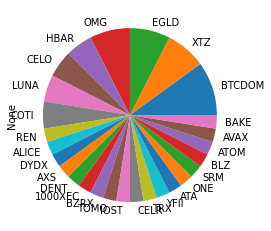

In [67]:
cnt.plot.pie()
plt.savefig('decouple_always_piechart.png', dpi=300) # todo : how to annotate percentage in the graph?

### Findings : BTC Dominance decoupled for all time, while others ranked in and out
However, XTZ, EGLD, OMG ranked in most of the times, failing only one time